<b>1</b> OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data)

3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

373
                 yields      ndvi  volImage  areaImage    hImage      hMed  \
yields         1.000000  0.493291  0.706488   0.644988  0.504954  0.576524   
ndvi           0.493291  1.000000  0.398165   0.415577  0.164466  0.304511   
volImage       0.706488  0.398165  1.000000   0.951090  0.685404  0.694521   
areaImage      0.644988  0.415577  0.951090   1.000000  0.451072  0.599245   
hImage         0.504954  0.164466  0.685404   0.451072  1.000000  0.685206   
hMed           0.576524  0.304511  0.694521   0.599245  0.685206  1.000000   
dataIafNdvi    0.533571  0.429618  0.518569   0.459096  0.393248  0.407755   
maxRed         0.648260  0.526981  0.617897   0.614893  0.352587  0.450213   
minRed        -0.014793  0.377154 -0.248836  -0.222953 -0.205839 -0.242124   
maxBlue        0.639422  0.566231  0.611173   0.631195  0.302320  0.413651   
meanRed        0.568315  0.581011  0.511285   0.546081  0.210284  0.325742   
minBlue        0.258619  0.667324  0.074037   0.116966 -0.05

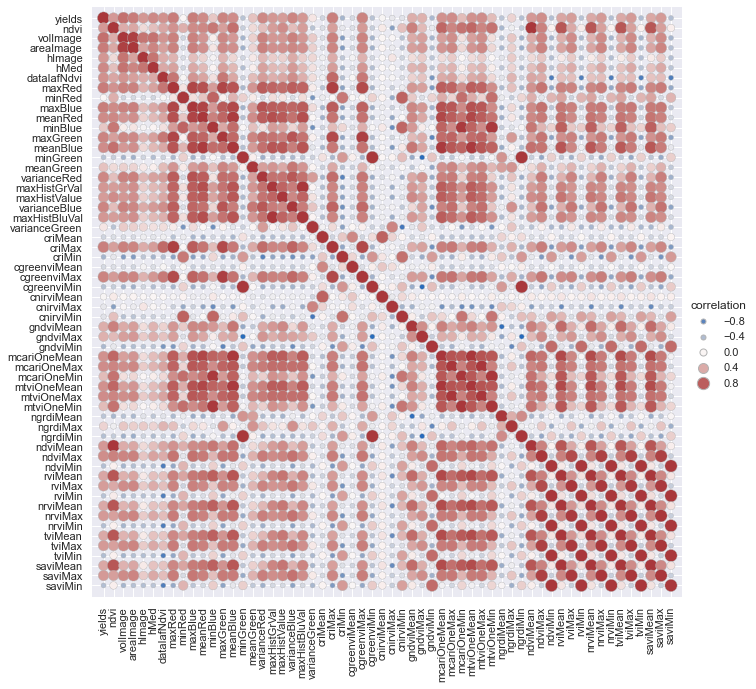

In [3]:
print(len(datos.datosYeld))
correlation=[]
correlation=dataframe.corr(method="pearson")
print(correlation)
sns.set(font_scale=1)
corr_mat = dataframe.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

GRAFICAS ENTRE VARIABLES

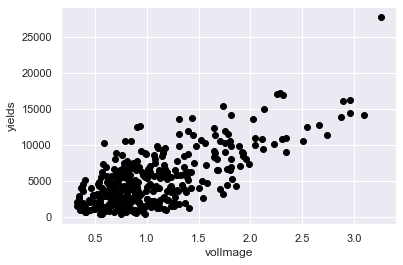

In [4]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


<AxesSubplot:>

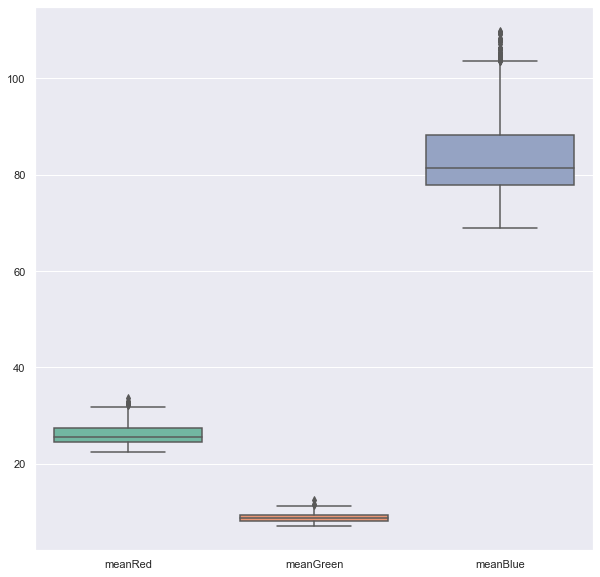

In [5]:

from sklearn.preprocessing import StandardScaler

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)
IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)

scaled_features = StandardScaler().fit_transform(dframeFinal.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dframeFinal.index, columns=dframeFinal.columns)
pyplot.figure(figsize=(10,10))
sns.boxplot(data=dataframe[['meanRed', 'meanGreen','meanBlue']],orient="v", palette="Set2")


3.648259646881603
1.451541527339079


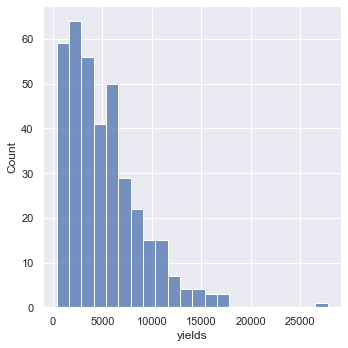

In [6]:
print(dframeFinal['yields'].kurt())
print(dframeFinal['yields'].skew())
sns.displot(dframeFinal['yields'])

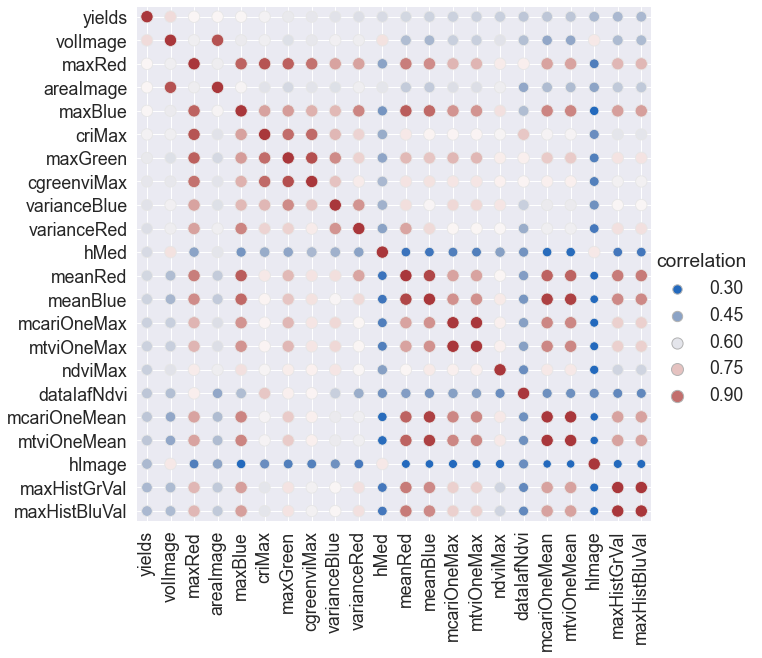

In [7]:
cols= correlation.nlargest(22,"yields")["yields"].index
cm= np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.6)
corr_mat = dataframe[cols].corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(0.3, 1), edgecolor=".9",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")



<h1> GRAFICAS DE VARIANZAS DE BANDAS</h1>

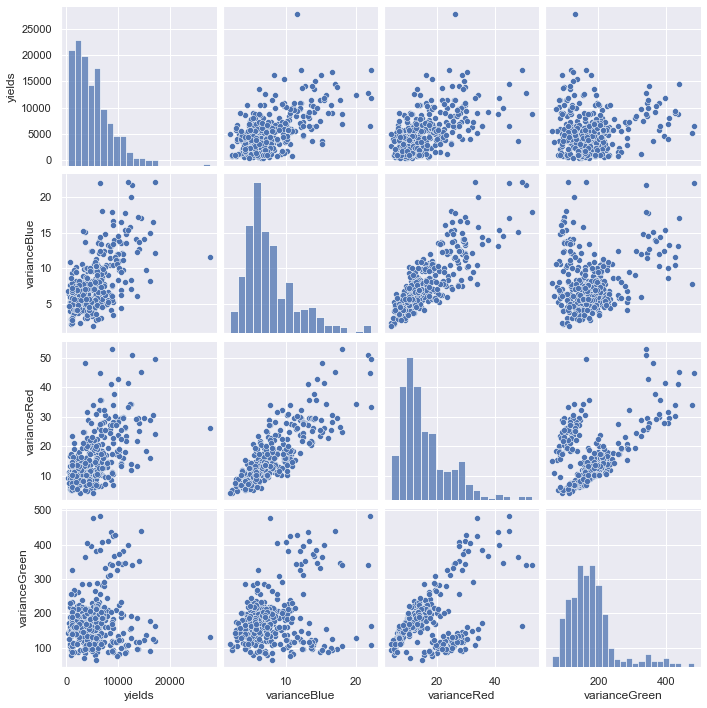

In [8]:

sns.set()
colsVariance = ["yields","varianceBlue","varianceRed","varianceGreen"]
sns.pairplot(dataframe[colsVariance],height=2.5,palette="muted",diag_kind="hist")
pyplot.show()

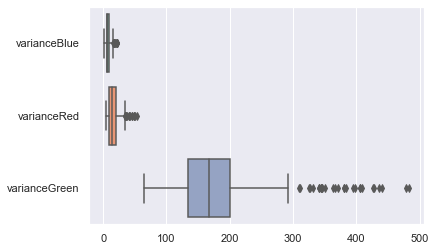

In [9]:
colsVariance = ["varianceBlue","varianceRed","varianceGreen"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1> GRAFICA DE NDVI </h1>

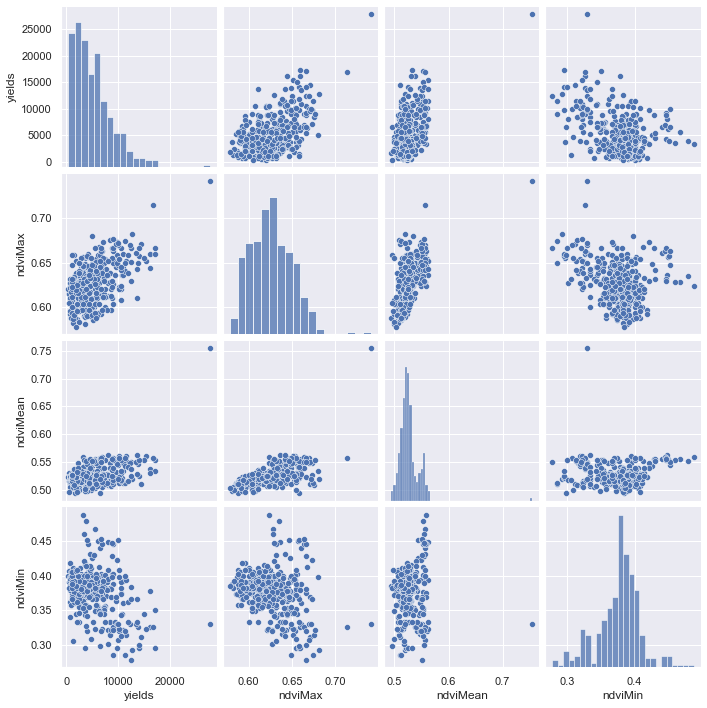

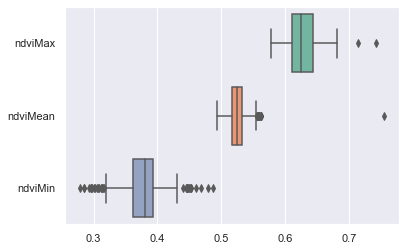

In [10]:
sns.set()
colsNdvi = ["yields","ndviMax","ndviMean","ndviMin"]
sns.pairplot(dataframe[colsNdvi],height=2.5)
pyplot.show()

colsVariance = ["ndviMax","ndviMean","ndviMin"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1>GRAFICA DE BANDAS</h1>

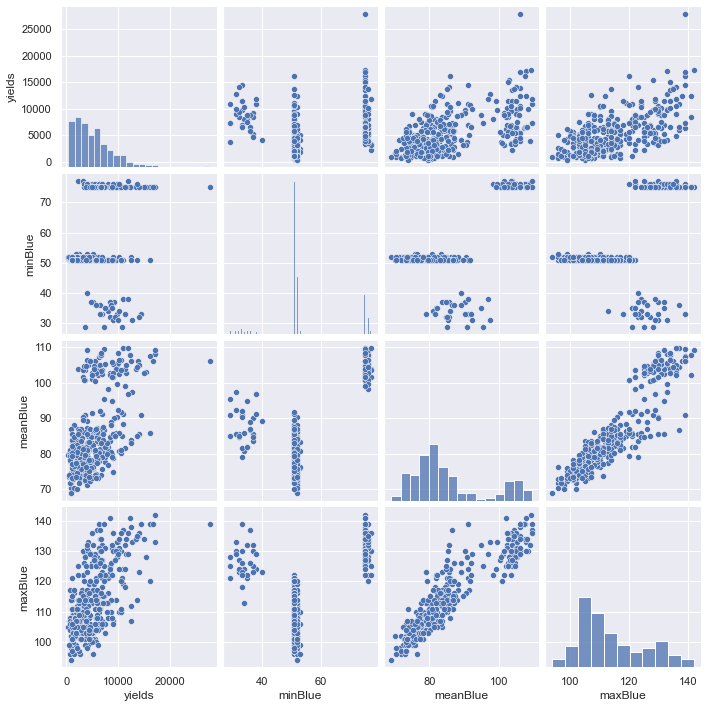

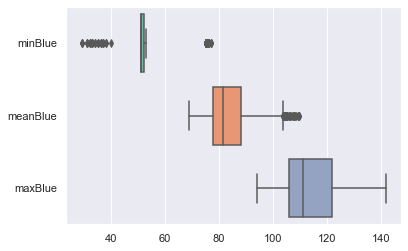

In [11]:
sns.set()
colsBlue = ["yields","minBlue","meanBlue","maxBlue"]
sns.pairplot(dataframe[colsBlue],height=2.5)
pyplot.show()

colsBlue = ["minBlue","meanBlue","maxBlue"]
ax = sns.boxplot(data=dataframe[colsBlue], orient="h", palette="Set2")

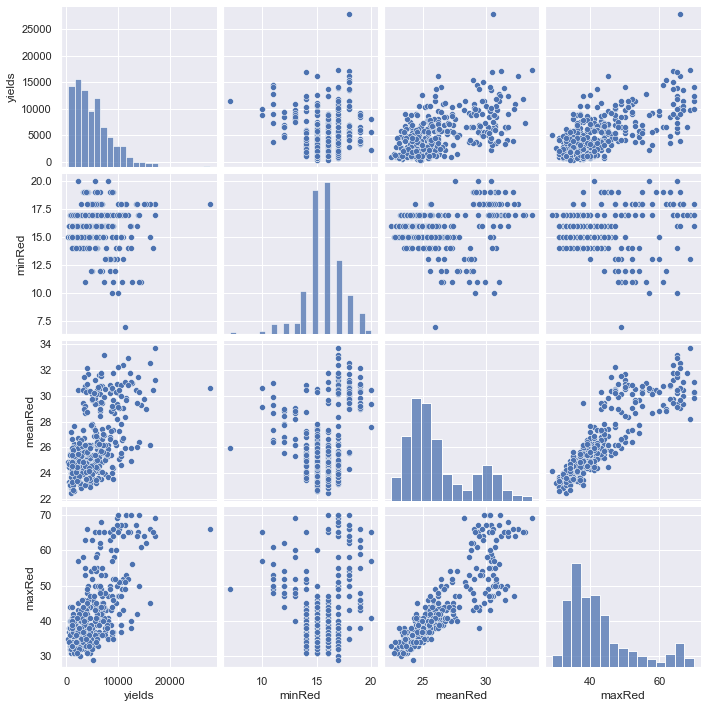

In [12]:
sns.set()
colsRed = ["yields","minRed","meanRed","maxRed"]
sns.pairplot(dataframe[colsRed],height=2.5)
pyplot.show()

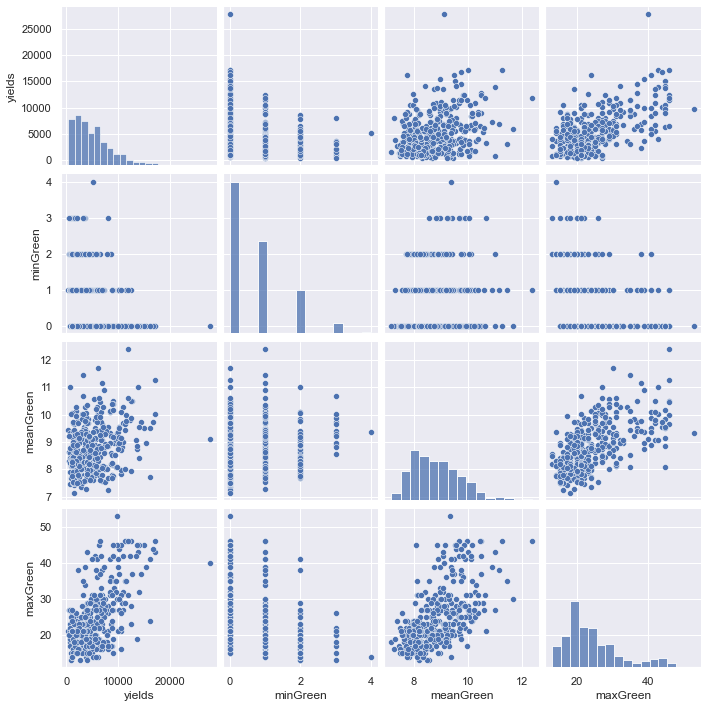

In [13]:
sns.set()
colsGreen = ["yields","minGreen","meanGreen","maxGreen"]
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

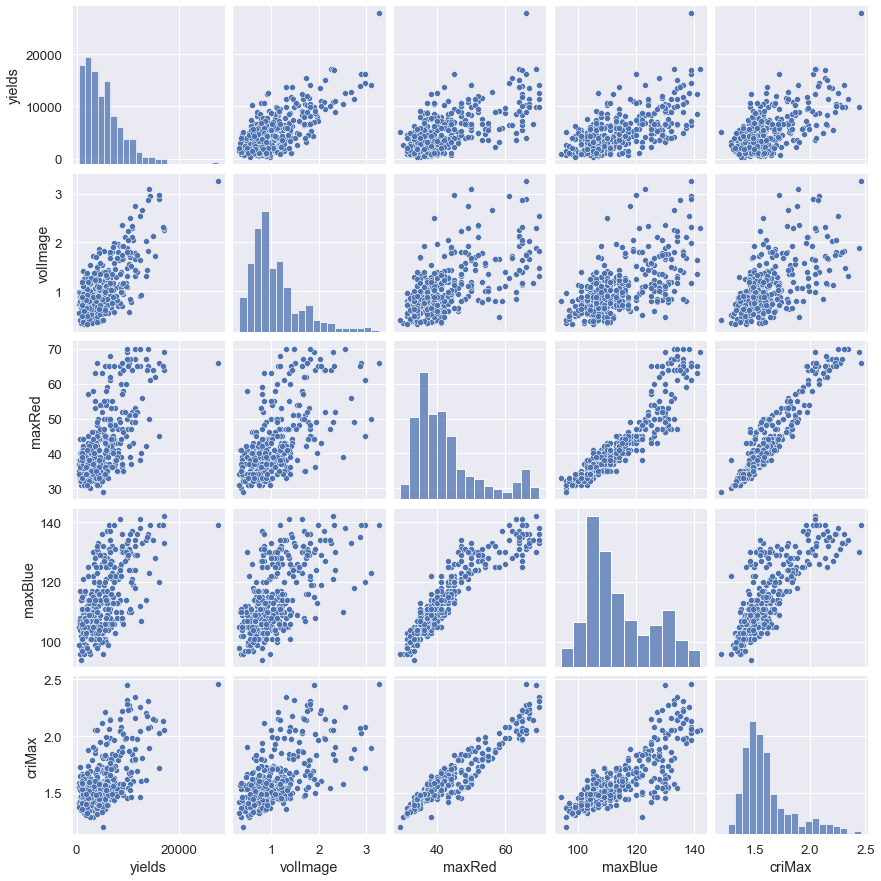

In [14]:
sns.set(font_scale=1.2)
colsGreen = ["yields",'volImage', 'maxRed', 'maxBlue','criMax']
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

<h1>NORMALIZE</h1>

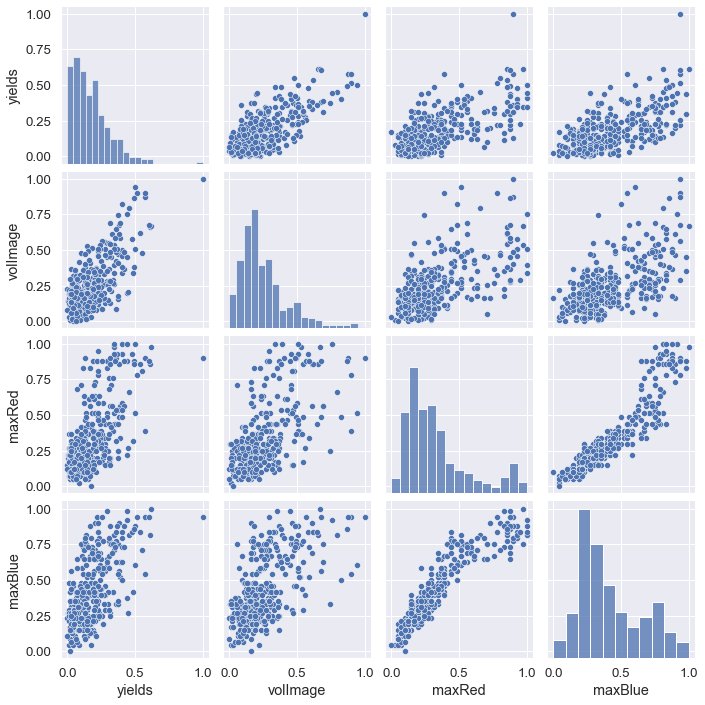

In [15]:
from sklearn.preprocessing import MinMaxScaler
colsRelations = ['yields','volImage', 'maxRed', 'maxBlue']
x = dataframe[colsRelations]
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = colsRelations
sns.pairplot(df,height=2.5)


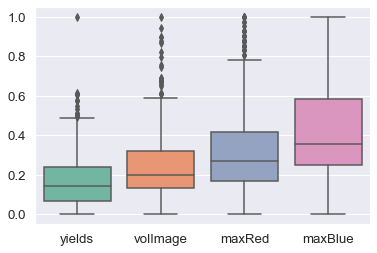

In [16]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")